In [ ]:
!pip install networkx

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# graph作成関数
# dataからgraphのフォーマットに合わせてのフォーマットに合わせてedge,nodeを追加を追加
# observed_col(観測変数リスト)からからNodeの枠をbox型に指定
def make_graph(data, observed):
  G = nx.DiGraph()
  for i in data.index:
    weight = round(data['Est. Std'].loc[i], 3)
    try:
      pval = round(float(data['p-value'].loc[i]), 3)
    except:
      pval = '-'
    label_str = f'''{weight}
    p-val : {pval}
    '''
    G.add_edge(data['rval'].loc[i], data['lval'].loc[i], label=label_str)
  
  for i, j in G.nodes(data=True):
    if i in observed:
      j['shape'] = 'box'

  return G

In [ ]:
# 作成したgraphから画像を作成
def visualize_graph(G):
  plt.figure(figsize=[5, 5])
  img = nx.nx_agraph.to_agraph(G)
  img.layout(prog='dot')
  img.draw('./visualized_path.png')
  return

In [ ]:
# SEMの結果のinspectをインポートする。
# 実行を行った後に可視化する際はcsv保存不要〜
data = pd.read_csv('./sample_inspect.csv', index_col=0)
data.head()

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482379,0.446751,0.39902352959721704,3.7150173295268685,0.0002031897688157258
1,dem65,~,ind60,0.571912,0.182178,0.22138267470408993,2.5833637611256925,0.009784210152006256
2,dem65,~,dem60,0.837574,0.885286,0.09844558409958741,8.507991582214794,0.0
3,x1,~,ind60,1.000000,0.919814,-,-,-
4,x2,~,ind60,2.180494,0.973010,0.13856497088322758,15.736253667594013,0.0


In [ ]:
# 今回はこれで作成しているがここは自分のデータに合わせて作成
observed_col_x = [f'x{i}' for i in range(1, 4)]
observed_col_y = [f'y{i}' for i in range(1, 9)]
observed_col = list(set(observed_col_x + observed_col_y))
observed_col

['y5', 'y3', 'y6', 'y8', 'x2', 'y7', 'x3', 'y2', 'y4', 'y1', 'x1']

In [ ]:
# データの絞り込みを行う。今回は共分散を表示しないようにするため、〜だけに絞り込む
# ここでP値値0.05以下、Weight0.3以上とかも絞り込んであげるとかも絞り込んであげる
data_tmp = data.copy()
# data_tmp = data_tmp[data_tmp['Est. Std'] >= 0.3]
# data_tmp = data_tmp[data_tmp['p-value'] <= 0.05]
picked_data = data_tmp[data_tmp['op']=='~']
picked_data.tail()

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
9,y4,~,dem60,1.265186,0.845633,0.14515098531657708,8.716344100268264,0.0
10,y5,~,dem65,1.000000,0.807842,-,-,-
11,y6,~,dem65,1.185743,0.745866,0.168908426490654,7.020032299134837,2.2182256032010628e-12
12,y7,~,dem65,1.279717,0.823655,0.15999637938877567,7.998409768033948,1.3322676295501878e-15
13,y8,~,dem65,1.266084,0.827667,0.15823791610091095,8.001141255329872,1.3322676295501878e-15


In [ ]:
# データからからgraphを作成し、observed_colを入れてあげることで、可視化時に可視化時にbox型で表示されるようにする
G = make_graph(picked_data, observed_col)

# 作成したgraphから画像を作成
visualize_graph(G)

<Figure size 360x360 with 0 Axes>

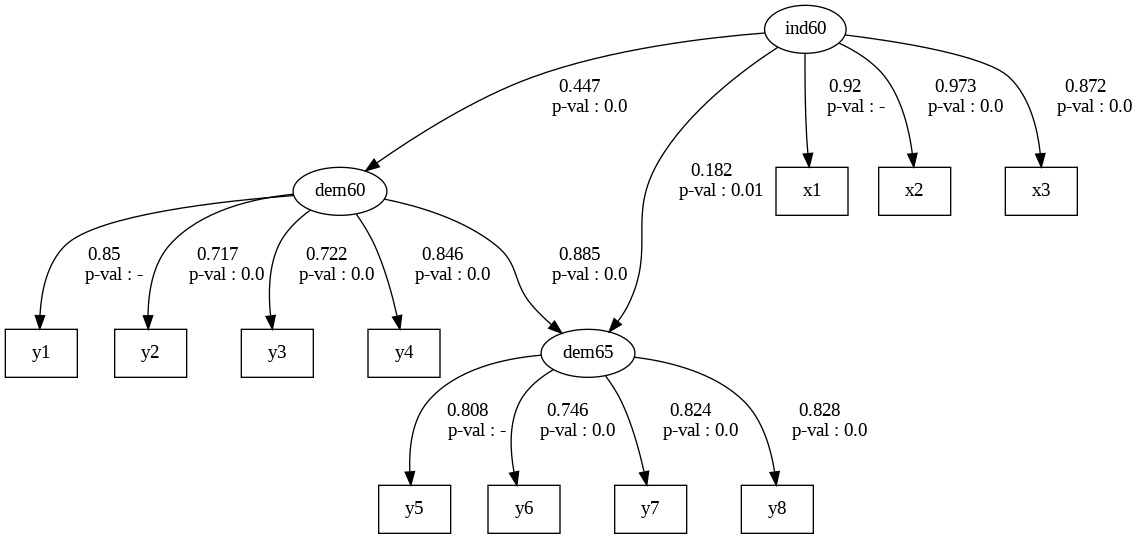

In [ ]:
# 画像の可視化
from PIL import Image
from IPython.display import display

with Image.open('./visualized_path.png') as im:
  display(im)